In [1]:
import numpy as np
import pandas as pd
import scanpy as sc

In [2]:
sc.settings.verbosity = 3
sc.logging.print_header()
sc.settings.set_figure_params(dpi=80, facecolor='white')

scanpy==1.8.2 anndata==0.7.8 umap==0.5.1 numpy==1.19.2 scipy==1.6.1 pandas==1.1.5 scikit-learn==0.23.2 statsmodels==0.12.2 python-igraph==0.9.8 pynndescent==0.5.2


In [3]:
results_file = 'ROSMAP_PFC.h5ad'

In [4]:
adata = sc.read_10x_mtx('/home/jzhuang/AMP/Source/brain_scRNAseq/',var_names='gene_symbols')

--> This might be very slow. Consider passing `cache=True`, which enables much faster reading from a cache file.


In [5]:
adata.var_names_make_unique()
adata

AnnData object with n_obs × n_vars = 27975 × 33694
    var: 'gene_ids'

normalizing counts per cell
    finished (0:00:00)


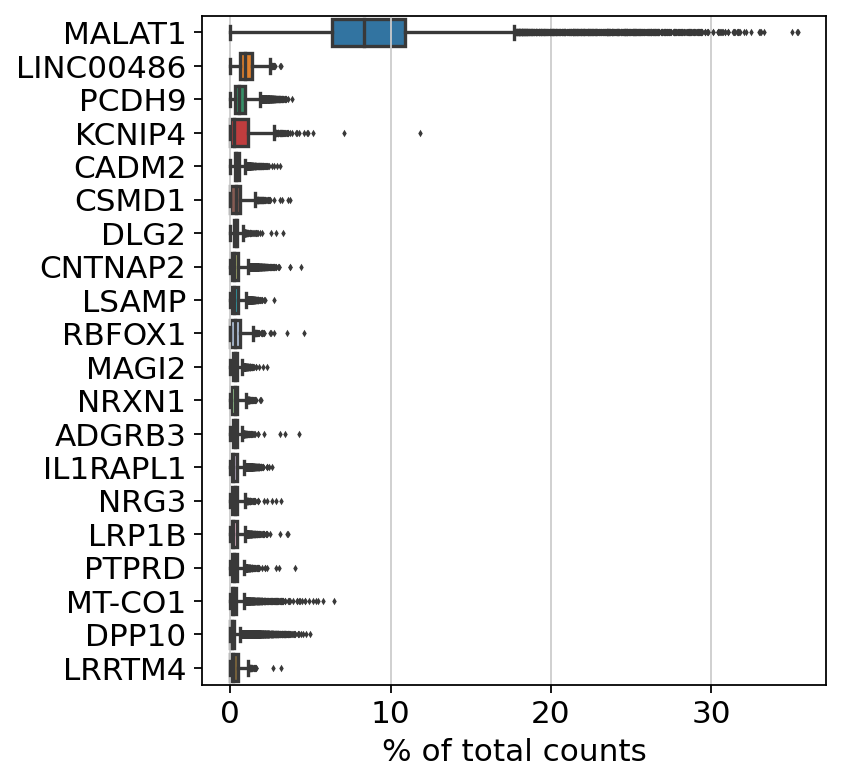

In [6]:
sc.pl.highest_expr_genes(adata, n_top=20, )

In [7]:
sc.pp.filter_cells(adata, min_genes=200)
sc.pp.filter_genes(adata, min_cells=3)

filtered out 6382 genes that are detected in less than 3 cells


In [8]:
adata.var['mt'] = adata.var_names.str.startswith('MT-')
sc.pp.calculate_qc_metrics(adata, qc_vars=['mt'], percent_top=None, log1p=False, inplace=True)

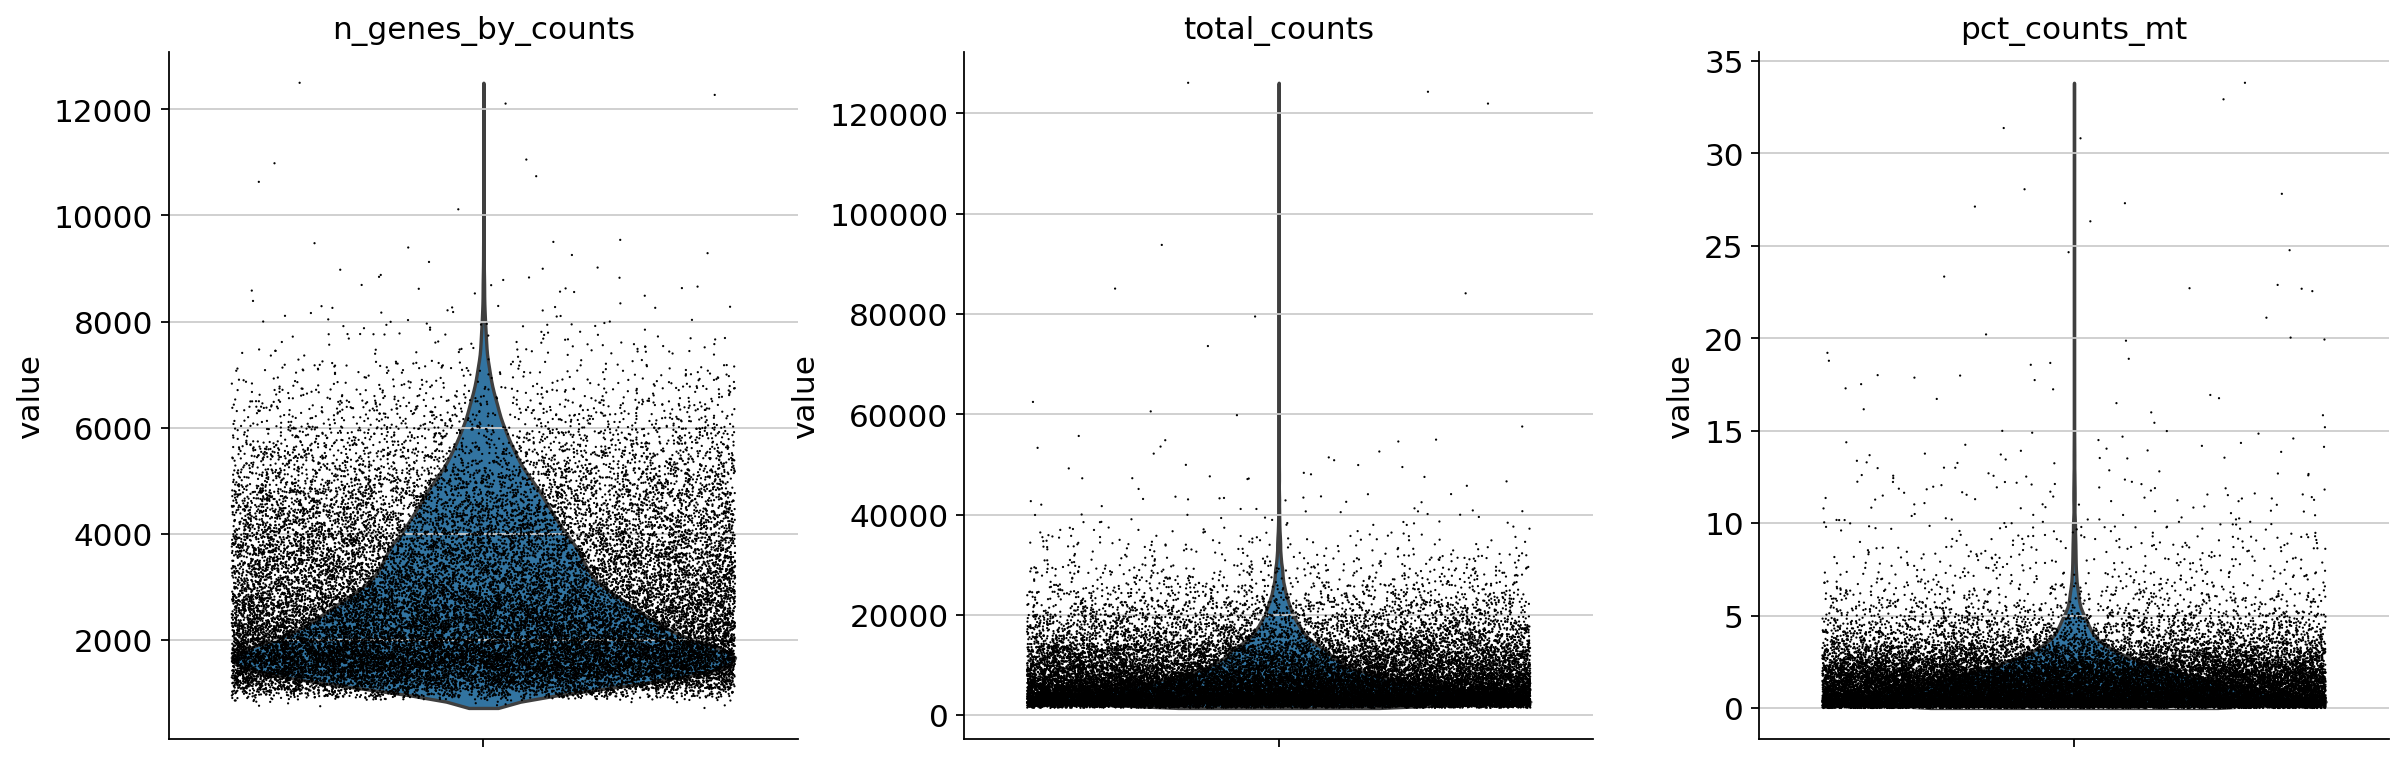

In [9]:
sc.pl.violin(adata, ['n_genes_by_counts','total_counts','pct_counts_mt'], jitter=0.4, multi_panel=True)

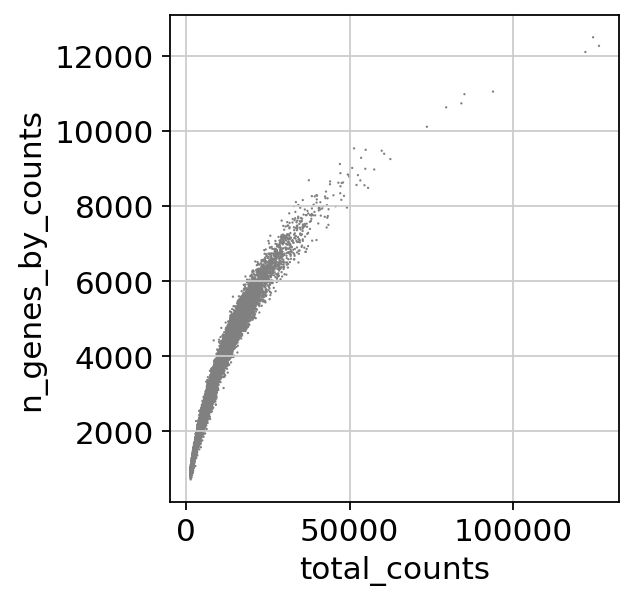

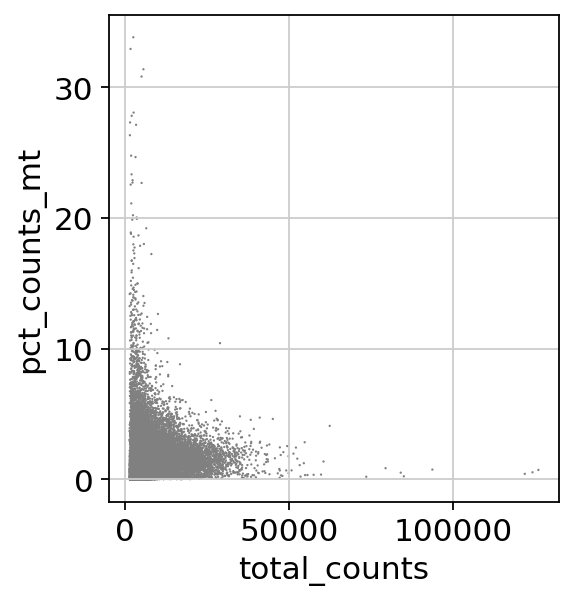

In [10]:
sc.pl.scatter(adata, x='total_counts', y='n_genes_by_counts')
sc.pl.scatter(adata, x='total_counts', y='pct_counts_mt')

In [11]:
adata.obs

n_genes  n_genes_by_counts  total_counts  total_counts_mt  \
AAACCTGAGGATCGCA-1     1888               1888        4272.0              8.0   
AAACCTGAGGGAGTAA-1     1748               1748        3326.0             20.0   
AAACCTGCAACAACCT-1     2185               2185        4766.0             48.0   
AAACCTGCAGATGGGT-1     3106               3106        8333.0            237.0   
AAACCTGCATCCGCGA-1      992                992        1828.0             13.0   
...                     ...                ...           ...              ...   
TTTGTCAGTGAGGGAG-9     1322               1321        2357.0             28.0   
TTTGTCAGTGCAACGA-9     1334               1334        2594.0              9.0   
TTTGTCAGTGGGTATG-9     1073               1073        1821.0              9.0   
TTTGTCAGTTAGGGTG-9     2784               2784        6598.0             20.0   
TTTGTCATCCACGTTC-9      890                890        2195.0              1.0   

                    pct_counts_mt  
AAACCTGAGGATCGCA-1       0.187266  
AAACCTGAGGGAGTAA-1       0.601323  
AAACCTGCAACAACCT-1       1.007134  
AAACCTGCAGATGGGT-1       2.844114  
AAACCTGCATCCGCGA-1       0.711160  
...                           ...  
TTTGTCAGTGAGGGAG-9       1.187951  
TTTGTCAGTGCAACGA-9       0.346955  
TTTGTCAGTGGGTATG-9       0.494234  
TTTGTCAGTTAGGGTG-9       0.303122  
TTTGTCATCCACGTTC-9       0.045558  

[27975 rows x 5 columns]

In [13]:
adata.var

gene_ids  n_cells     mt  n_cells_by_counts  \
RP11-34P13.3   ENSG00000243485        6  False                  6   
RP11-34P13.7   ENSG00000238009     1171  False               1171   
FO538757.2     ENSG00000279457     7701  False               7701   
AP006222.2     ENSG00000228463     4083  False               4083   
RP5-857K21.15  ENSG00000236743        7  False                  7   
...                        ...      ...    ...                ...   
AC007325.2     ENSG00000277196      711  False                711   
BX072566.1     ENSG00000277630        8  False                  8   
AL354822.1     ENSG00000278384      696  False                696   
AC004556.1     ENSG00000276345      175  False                175   
AC240274.1     ENSG00000271254     1841  False               1841   

               mean_counts  pct_dropout_by_counts  total_counts  
RP11-34P13.3      0.000214              99.978552           6.0  
RP11-34P13.7      0.044075              95.814120        1233.0  
FO538757.2        0.347560              72.471850        9723.0  
AP006222.2        0.173262              85.404826        4847.0  
RP5-857K21.15     0.000250              99.974978           7.0  
...                    ...                    ...           ...  
AC007325.2        0.028132              97.458445         787.0  
BX072566.1        0.000286              99.971403           8.0  
AL354822.1        0.027024              97.512064         756.0  
AC004556.1        0.006399              99.374441         179.0  
AC240274.1        0.070670              93.419124        1977.0  

[27312 rows x 7 columns]

In [14]:
adata = adata[adata.obs.n_genes_by_counts < 7000, :]
adata = adata[adata.obs.pct_counts_mt < 5, :]

In [15]:
adata.obs

n_genes  n_genes_by_counts  total_counts  total_counts_mt  \
AAACCTGAGGATCGCA-1     1888               1888        4272.0              8.0   
AAACCTGAGGGAGTAA-1     1748               1748        3326.0             20.0   
AAACCTGCAACAACCT-1     2185               2185        4766.0             48.0   
AAACCTGCAGATGGGT-1     3106               3106        8333.0            237.0   
AAACCTGCATCCGCGA-1      992                992        1828.0             13.0   
...                     ...                ...           ...              ...   
TTTGTCAGTGAGGGAG-9     1322               1321        2357.0             28.0   
TTTGTCAGTGCAACGA-9     1334               1334        2594.0              9.0   
TTTGTCAGTGGGTATG-9     1073               1073        1821.0              9.0   
TTTGTCAGTTAGGGTG-9     2784               2784        6598.0             20.0   
TTTGTCATCCACGTTC-9      890                890        2195.0              1.0   

                    pct_counts_mt  
AAACCTGAGGATCGCA-1       0.187266  
AAACCTGAGGGAGTAA-1       0.601323  
AAACCTGCAACAACCT-1       1.007134  
AAACCTGCAGATGGGT-1       2.844114  
AAACCTGCATCCGCGA-1       0.711160  
...                           ...  
TTTGTCAGTGAGGGAG-9       1.187951  
TTTGTCAGTGCAACGA-9       0.346955  
TTTGTCAGTGGGTATG-9       0.494234  
TTTGTCAGTTAGGGTG-9       0.303122  
TTTGTCATCCACGTTC-9       0.045558  

[26799 rows x 5 columns]

In [16]:
sc.pp.normalize_total(adata, target_sum=1e4)
sc.pp.log1p(adata)
sc.pp.highly_variable_genes(adata, min_mean=0.0125, max_mean=3, min_disp=0.5)

/opt/biomarker/anaconda3/lib/python3.7/site-packages/scanpy/preprocessing/_normalization.py:155: UserWarning: Revieved a view of an AnnData. Making a copy.
  view_to_actual(adata)


normalizing counts per cell
    finished (0:00:00)
extracting highly variable genes
    finished (0:00:01)
--> added
    'highly_variable', boolean vector (adata.var)
    'means', float vector (adata.var)
    'dispersions', float vector (adata.var)
    'dispersions_norm', float vector (adata.var)


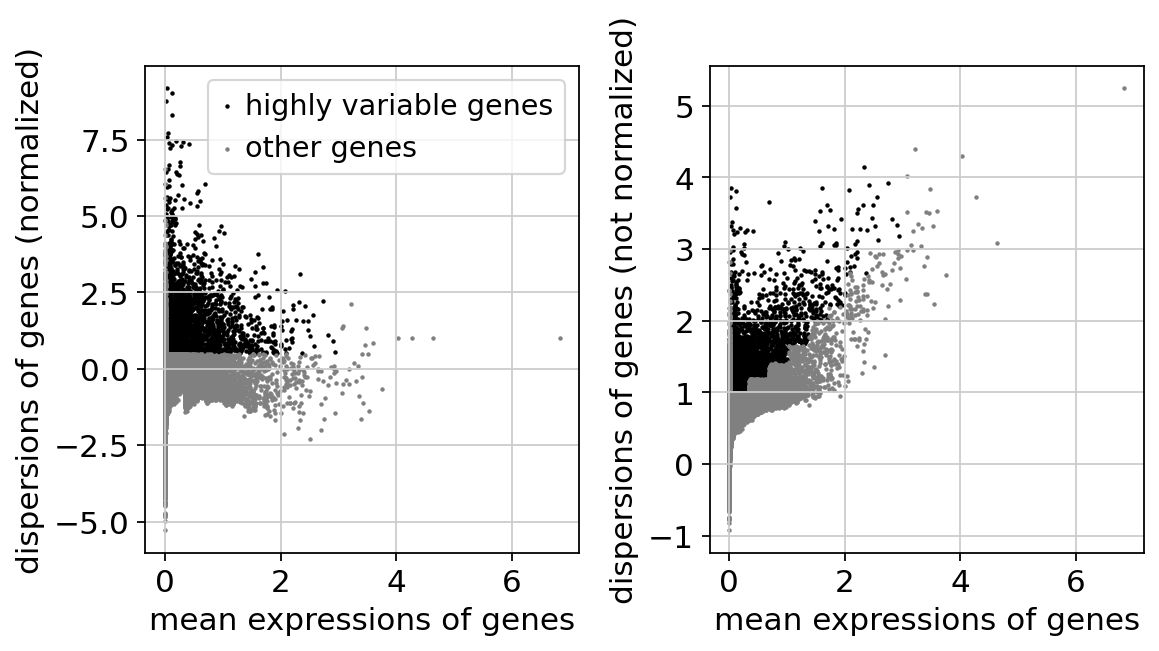

In [17]:
sc.pl.highly_variable_genes(adata)

In [18]:
adata.raw = adata

In [19]:
adata = adata[:, adata.var.highly_variable]

In [20]:
adata.var

gene_ids  n_cells     mt  n_cells_by_counts  mean_counts  \
ISG15       ENSG00000187608      621  False                621     0.025165   
ANKRD65     ENSG00000235098     1373  False               1373     0.052797   
VWA1        ENSG00000179403     2787  False               2787     0.126434   
ATAD3C      ENSG00000215915      816  False                816     0.031063   
HES5        ENSG00000197921      420  False                420     0.016765   
...                     ...      ...    ...                ...          ...   
COL6A2      ENSG00000142173      212  False                212     0.009473   
LSS         ENSG00000160285     5792  False               5792     0.274138   
MCM3AP-AS1  ENSG00000215424     2888  False               2888     0.119285   
S100B       ENSG00000160307     3618  False               3618     0.178445   
AC007325.2  ENSG00000277196      711  False                711     0.028132   

            pct_dropout_by_counts  total_counts  highly_variable     means  \
ISG15                   97.780161         704.0             True  0.033859   
ANKRD65                 95.092046        1477.0             True  0.091131   
VWA1                    90.037534        3537.0             True  0.273245   
ATAD3C                  97.083110         869.0             True  0.057422   
HES5                    98.498660         469.0             True  0.030319   
...                           ...           ...              ...       ...   
COL6A2                  99.242181         265.0             True  0.018990   
LSS                     79.295800        7669.0             True  0.449408   
MCM3AP-AS1              89.676497        3337.0             True  0.187363   
S100B                   87.067024        4992.0             True  0.328989   
AC007325.2              97.458445         787.0             True  0.056967   

            dispersions  dispersions_norm  
ISG15          1.039745          0.660259  
ANKRD65        1.143555          0.974185  
VWA1           1.418528          1.805717  
ATAD3C         1.105658          0.859584  
HES5           1.055874          0.709035  
...                 ...               ...  
COL6A2         1.597377          2.346562  
LSS            1.382685          1.157182  
MCM3AP-AS1     1.120641          0.904892  
S100B          1.350656          1.600467  
AC007325.2     1.040405          0.662256  

[4150 rows x 11 columns]

In [21]:
sc.pp.regress_out(adata, ['total_counts','pct_counts_mt'])
sc.pp.scale(adata, max_value=10)

regressing out ['total_counts', 'pct_counts_mt']
    sparse input is densified and may lead to high memory use
    finished (0:01:48)


computing PCA
    on highly variable genes
    with n_comps=50
    finished (0:00:05)


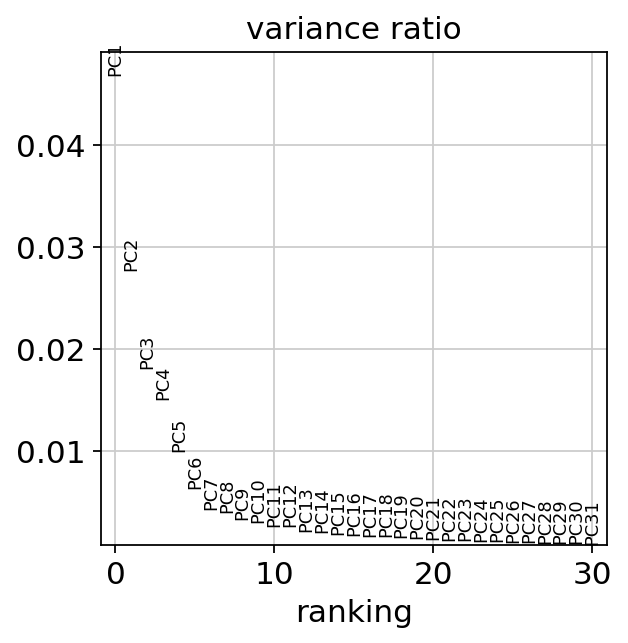

In [22]:
sc.tl.pca(adata, svd_solver='arpack')
sc.pl.pca_variance_ratio(adata, log=False)

In [23]:
adata.write(results_file)
adata

AnnData object with n_obs × n_vars = 26799 × 4150
    obs: 'n_genes', 'n_genes_by_counts', 'total_counts', 'total_counts_mt', 'pct_counts_mt'
    var: 'gene_ids', 'n_cells', 'mt', 'n_cells_by_counts', 'mean_counts', 'pct_dropout_by_counts', 'total_counts', 'highly_variable', 'means', 'dispersions', 'dispersions_norm', 'mean', 'std'
    uns: 'log1p', 'hvg', 'pca'
    obsm: 'X_pca'
    varm: 'PCs'

In [24]:
sc.pp.neighbors(adata, n_neighbors=20, n_pcs=7)

computing neighbors
    using 'X_pca' with n_pcs = 7
    finished: added to `.uns['neighbors']`
    `.obsp['distances']`, distances for each pair of neighbors
    `.obsp['connectivities']`, weighted adjacency matrix (0:00:14)


In [25]:
sc.tl.umap(adata)

computing UMAP
    finished: added
    'X_umap', UMAP coordinates (adata.obsm) (0:00:22)


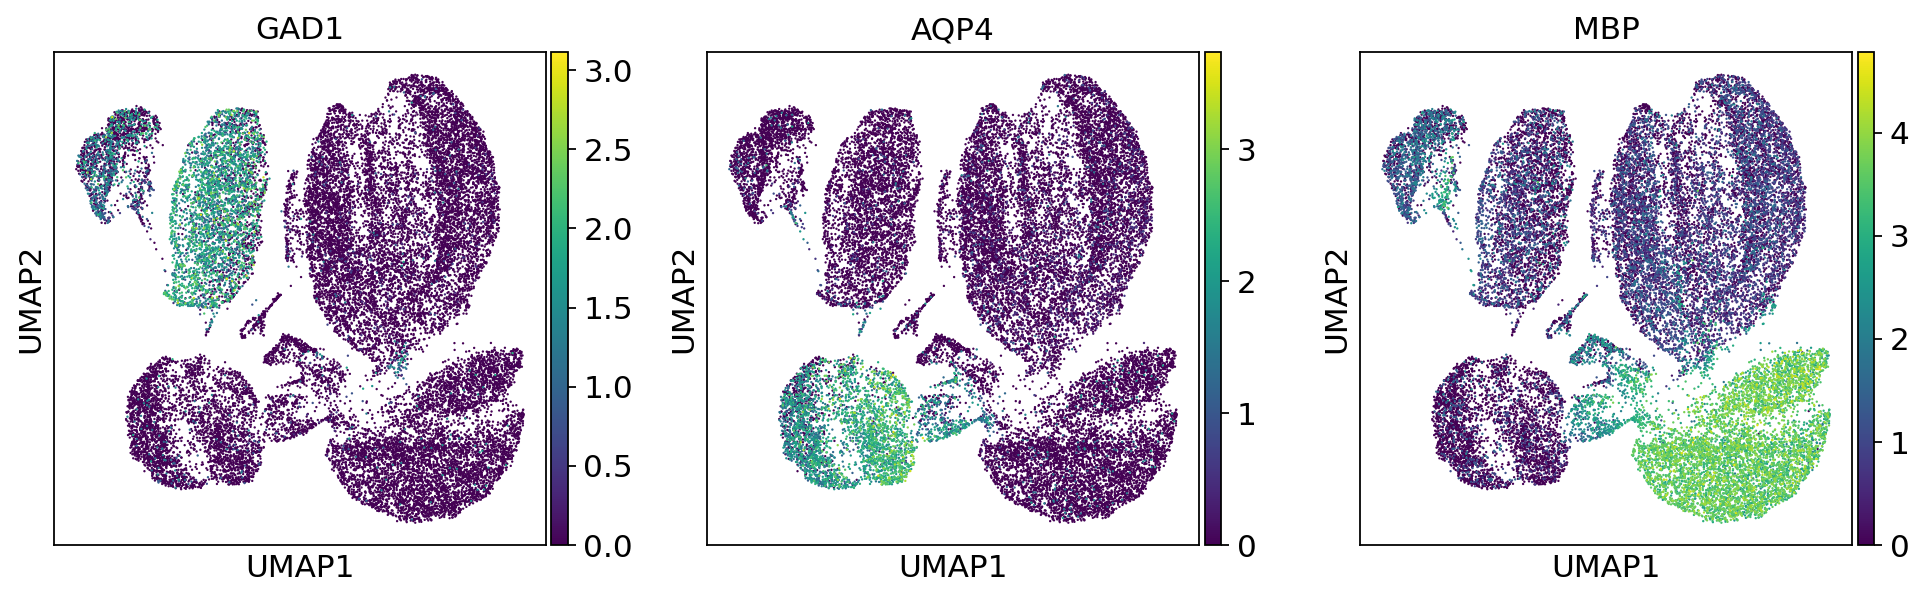

In [26]:
sc.pl.umap(adata, color=['GAD1', 'AQP4', 'MBP'])

In [29]:
sc.tl.leiden(adata,resolution=.4)

running Leiden clustering
    finished: found 14 clusters and added
    'leiden', the cluster labels (adata.obs, categorical) (0:00:02)


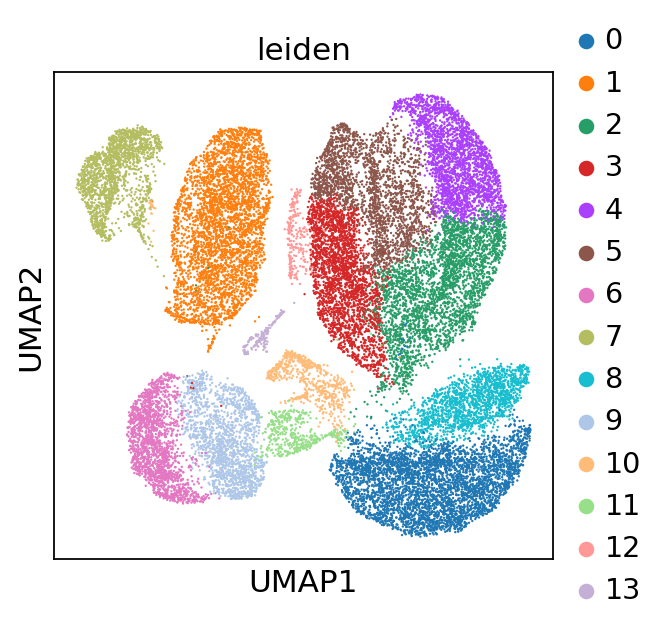

In [30]:
sc.pl.umap(adata, color=['leiden'])

ranking genes
    finished (0:00:50)


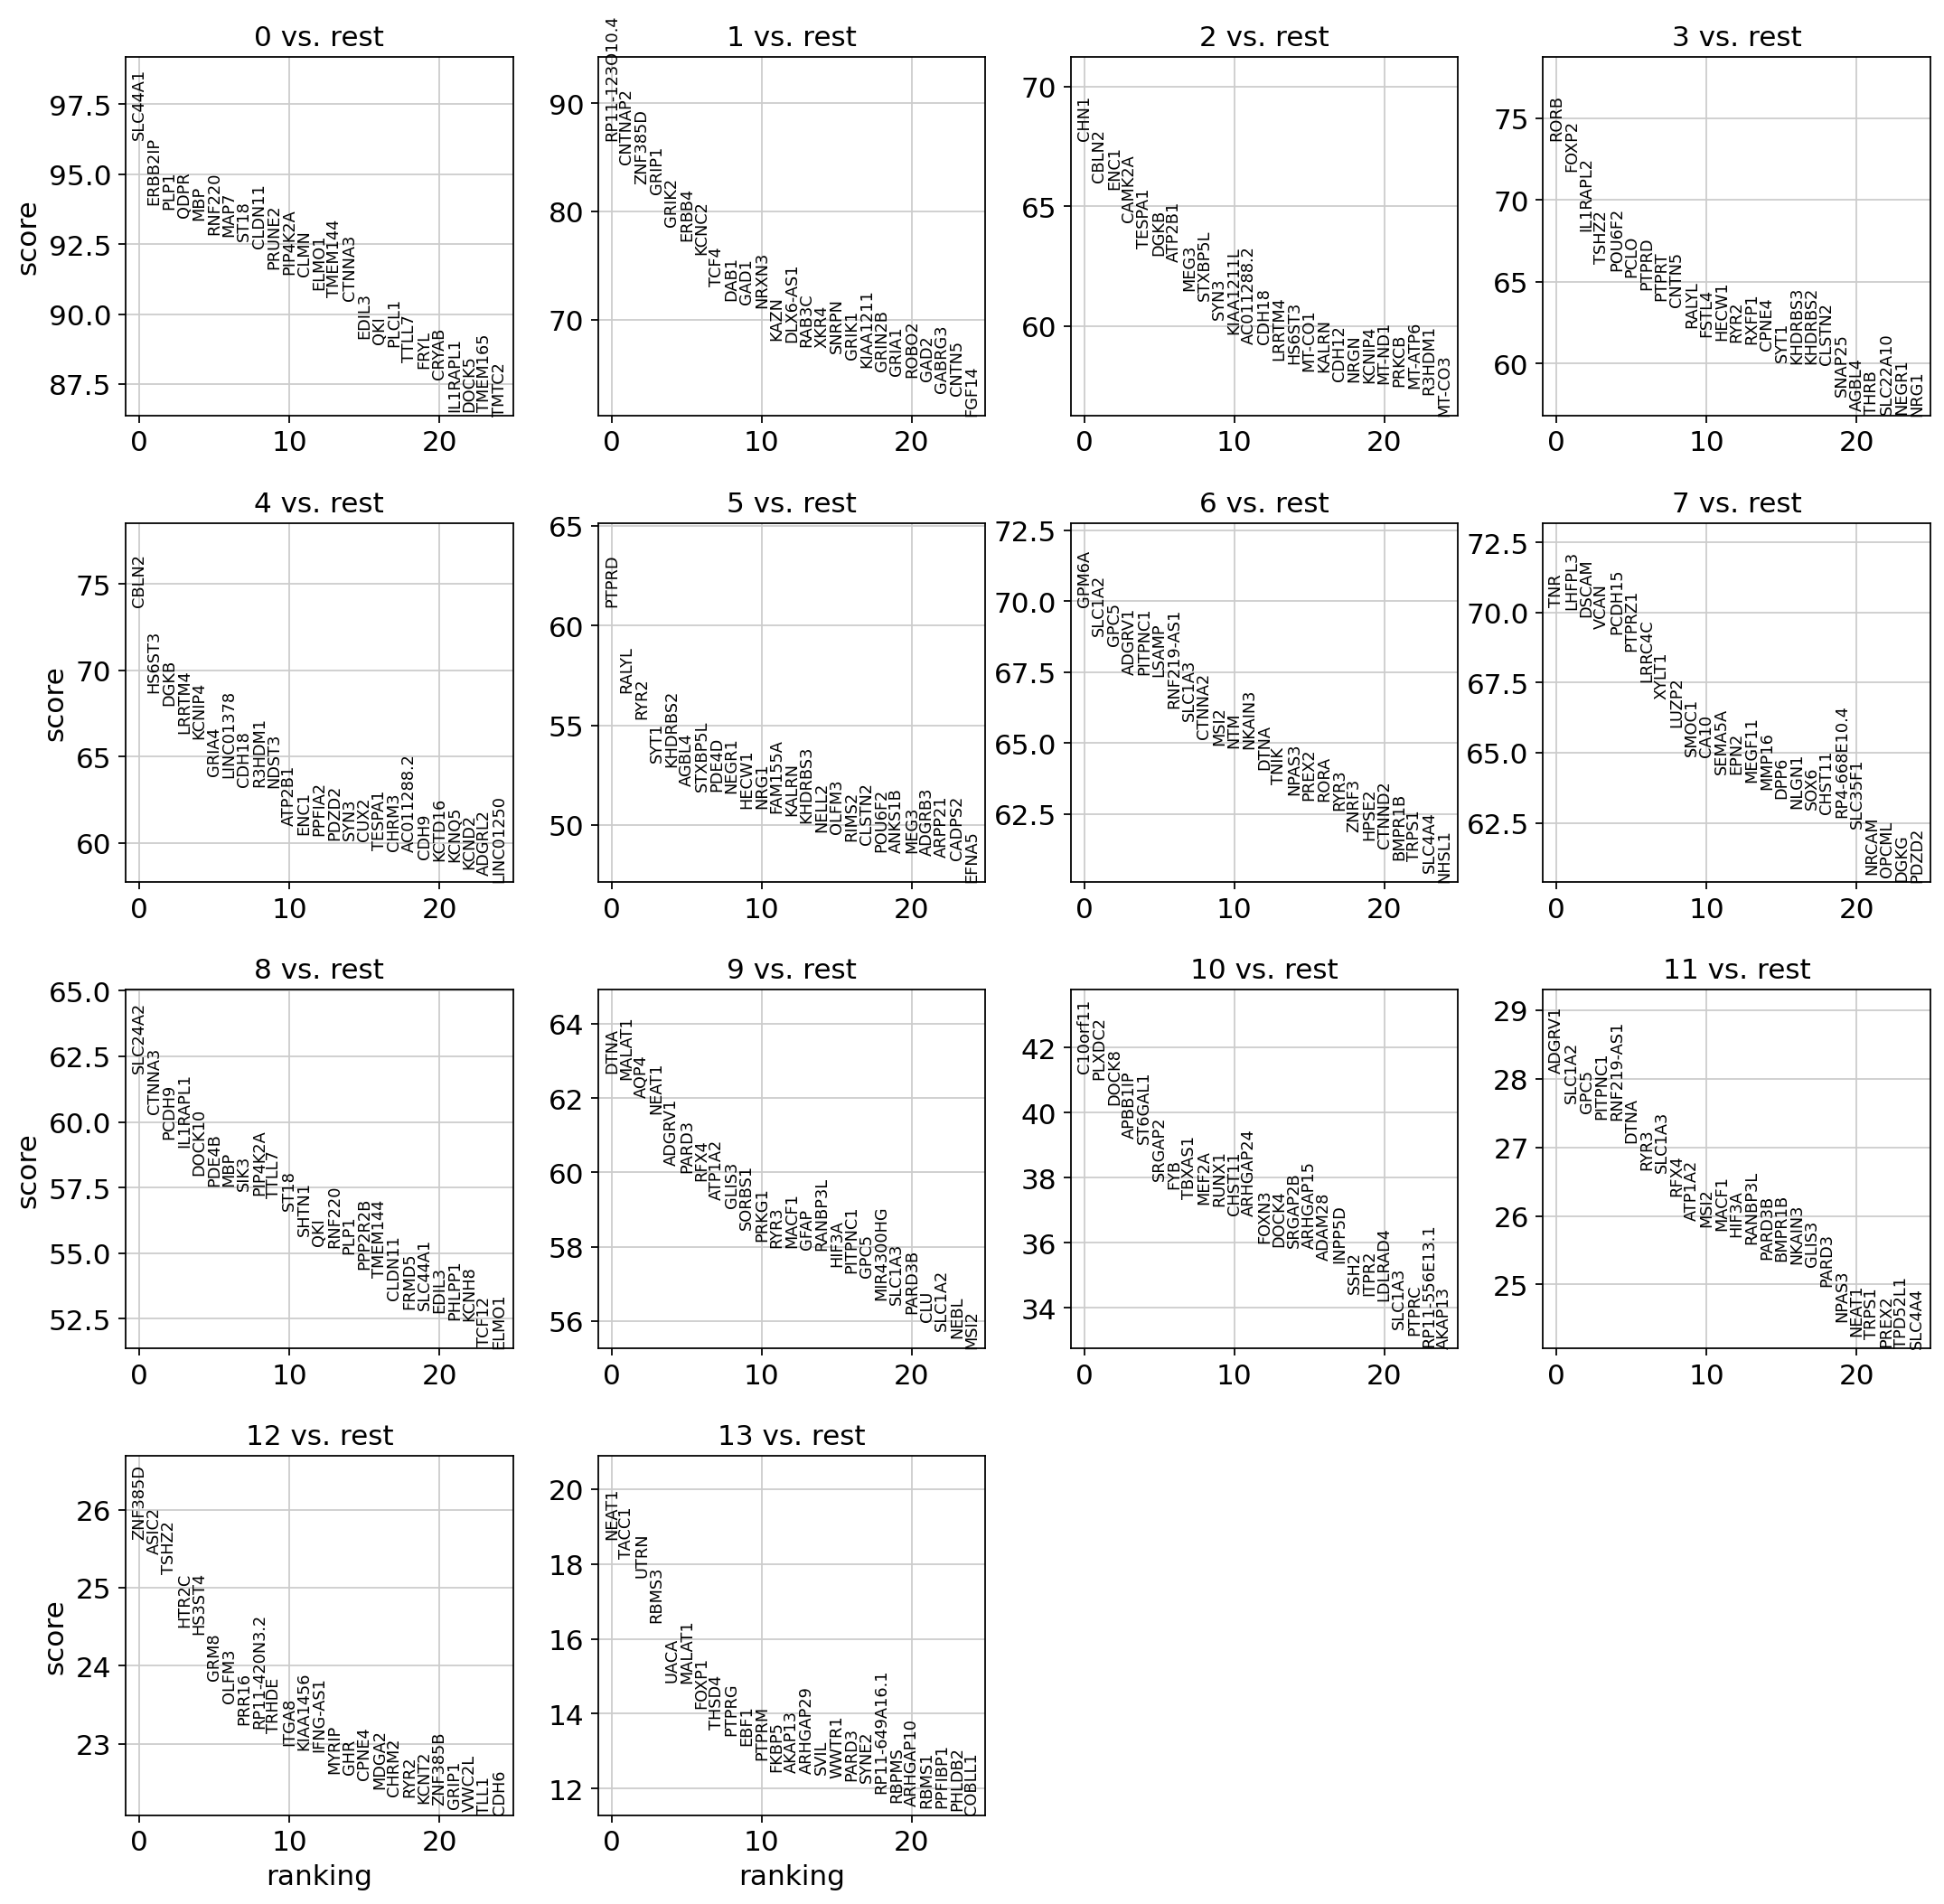

In [31]:
sc.settings.verbosity = 2
sc.tl.rank_genes_groups(adata, 'leiden', method='wilcoxon')
sc.pl.rank_genes_groups(adata, n_genes=25, sharey=False)

In [34]:
adata.write(results_file)

In [35]:
adata

AnnData object with n_obs × n_vars = 26799 × 4150
    obs: 'n_genes', 'n_genes_by_counts', 'total_counts', 'total_counts_mt', 'pct_counts_mt', 'leiden'
    var: 'gene_ids', 'n_cells', 'mt', 'n_cells_by_counts', 'mean_counts', 'pct_dropout_by_counts', 'total_counts', 'highly_variable', 'means', 'dispersions', 'dispersions_norm', 'mean', 'std'
    uns: 'log1p', 'hvg', 'pca', 'neighbors', 'umap', 'leiden', 'leiden_colors', 'rank_genes_groups'
    obsm: 'X_pca', 'X_umap'
    varm: 'PCs'
    obsp: 'distances', 'connectivities'

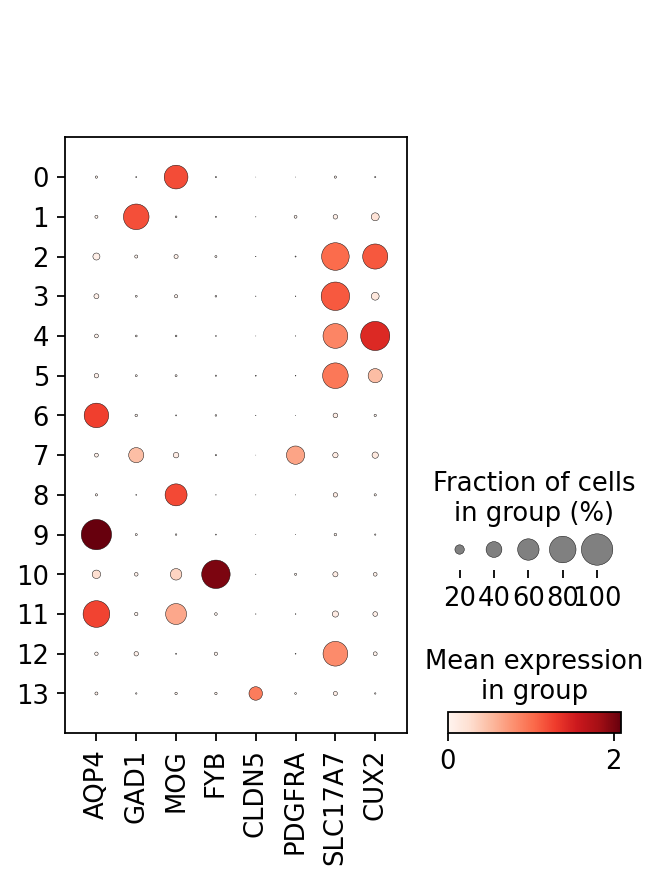

In [35]:
marker_genes = ['AQP4','GAD1','MOG','FYB','CLDN5','PDGFRA','SLC17A7','CUX2']
sc.pl.dotplot(adata, marker_genes, groupby='leiden')

In [43]:
new_cluster_names = {
    '0':'Oligodendrocyte', '1':'Inhibitory Neu', '2':'Excitatory Neu', '3':'Excitatory Neu', 
    '4':'Excitatory Neu', '5':'Excitatory Neu', '6':'Astrocyte', '7':'OPC', 
    '8':'Oligodendrocyte', '9':'Astrocyte', '10':'Microglia', '11':'Astrocyte', 
    '12':'Excitatory Neu', '13':'Endothelial cell'}
adata.obs['new_cluster'] = adata.obs['leiden'].map(new_cluster_names).astype('category')

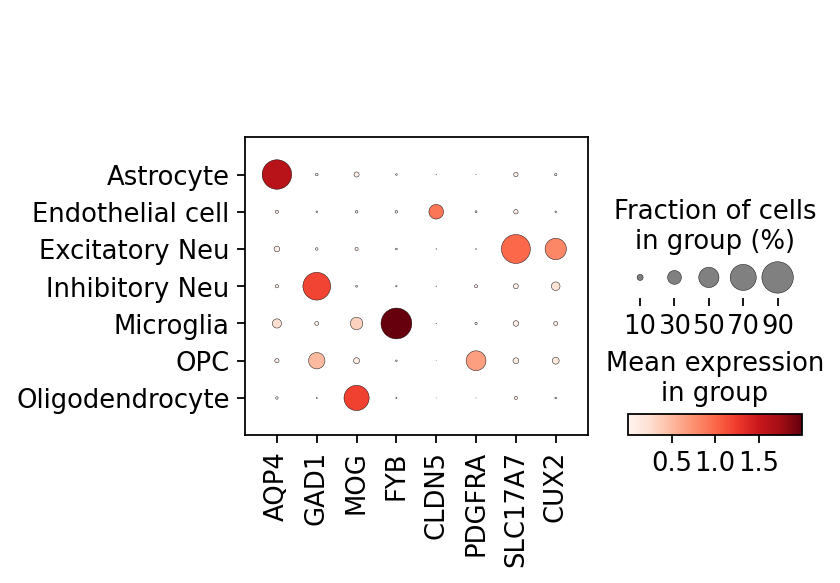

In [45]:
sc.pl.dotplot(adata, marker_genes, groupby='new_cluster')

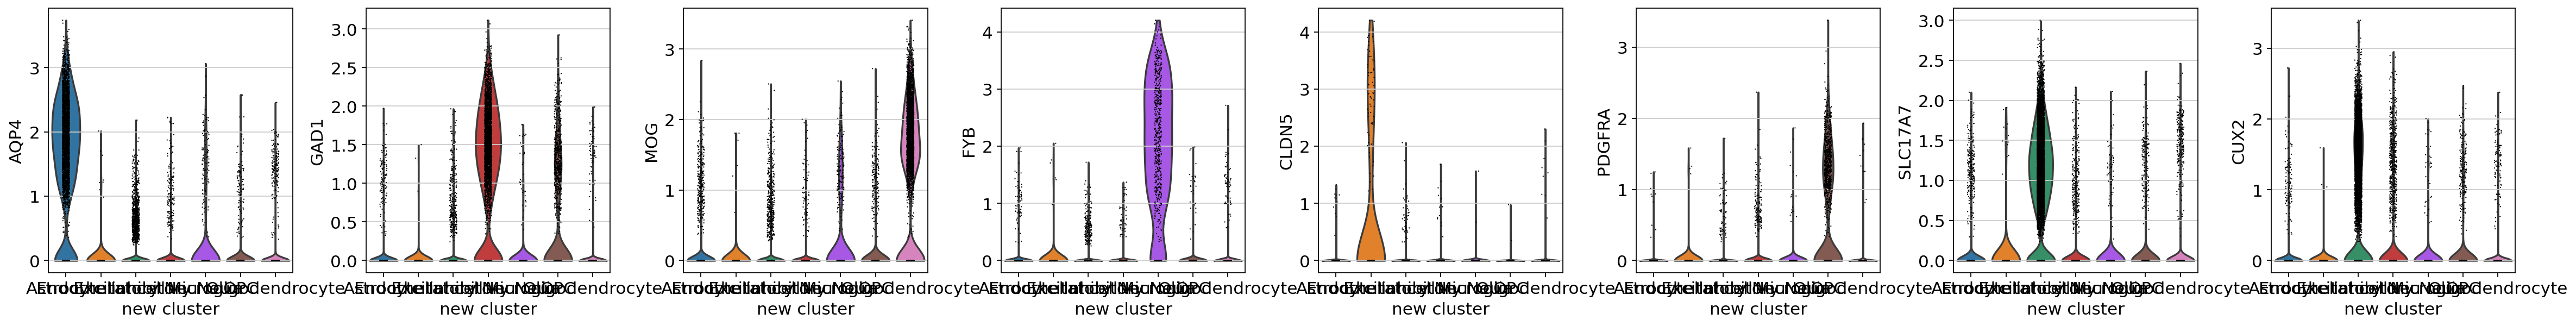

In [51]:
sc.pl.violin(adata, marker_genes, groupby='new_cluster')

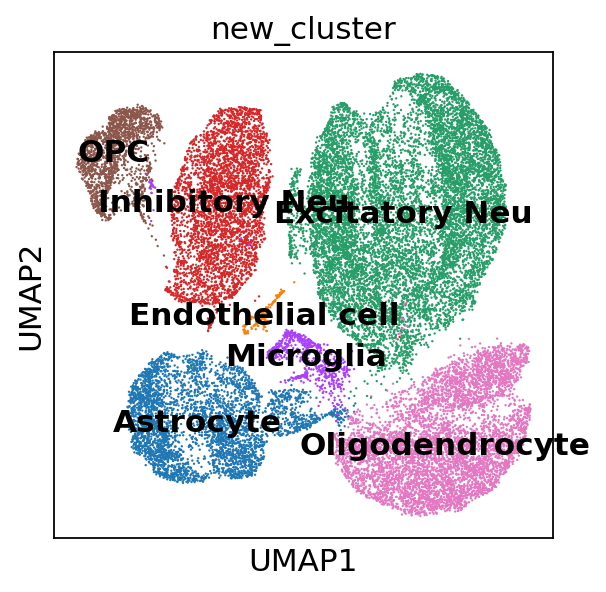

In [46]:
sc.pl.umap(adata, color='new_cluster', legend_loc='on data')

In [47]:
adata.write(results_file)